In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np


# Data judul berita dan teks
dataset = pd.read_csv("Data_latih.csv")

# Membuat DataFrame
df = pd.DataFrame(dataset)

# Mengecek panjang dataset untuk memastikan tidak ada kesalahan
print(f"Jumlah dataset: {len(df)}")
print(df.head())


Jumlah dataset: 4231
    ID  label    tanggal                                              judul  \
0   71      1  17-Aug-20  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1  17-Jul-20  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1  13-Jul-20  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1   8-Jul-20  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1  24-Jun-20       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  
0  A caller to a radio talk show recently shared ...           71.jpg  
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png  
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png  
3  Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...          550.png  
4        Kadrun kalo lihat foto ini panas dingin . .          681.jpg  


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
# Random seed for consistency
np.random.seed(42)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Label Encoder use to Encode target labels with value between 0 and n_classes-1
Encoder = LabelEncoder()

# TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features.
Tfidf_vect = TfidfVectorizer()

In [8]:
dataset

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
...,...,...,...,...,...,...
4226,999287,1,17-Jan-16,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,KPK Dilarang Membawa Brimob Bersenjata Masuk G...,999287.jpg
4227,999472,1,20-Aug-20,Foto pejabat keuangan dibawah palu arit,Jangan mau dialihkan kepada pakaian adat… FOKU...,999472.png
4228,999501,1,17-Aug-20,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,Akhir nya bisa terkenal bang denny,999501.jpg
4229,999848,1,21-Jul-20,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat...,999848.jpg


In [9]:
dataset['label'].value_counts()

,count
label,
1,3465
0,766


In [10]:
# Dari cell sebelumnya terlihat jelas bahwa dataset kita sangat tidak balance
# Untuk membuat datasetnya balance

# Pilih dataset dengan label 1 dan lakukan randomisasi untuk setiap baris datanya
false_news = dataset[dataset['label'] == 1].sample(frac=1)

# Concat dataset berlabel 1 yang telah dipilih dengan dataset berlabel 0
# dimana jumlah dataset berlabel 1 yang digabungkan sejumlah banyak dataset berlabel 0 + 200
true_fact = dataset[dataset['label'] == 0]

df = pd.concat([true_fact, false_news[:len(true_fact) + 200]], ignore_index=True)


df

,ID,label,tanggal,judul,narasi,nama file gambar
0,6775,0,25-Oct-17,Sandi Sarankan Warga Ngadu ke Kelurahan Saja,Astaga! Sandiaga Sarankan Warga Ngadu ke Kelur...,6775.jpg
1,7038,0,13-Jul-17,"Irina, Istri Ahli IT Hermansyah disebut Mantan...","Irina, Istri Ahli IT Hermansyah disebut Mantan...",7038.jpg
2,7214,0,8-Mar-17,"Nezar Patria adalah Kader PKI, Ikut Rapat Seti...","Nezar Patria adalah Kader PKI, Ikut Rapat Seti...",7214.jpg
3,13483,0,17-Jul-18,Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...,Kendati sukses mengantarkan Timnas Indonesia U...,13483.png
4,13907,0,28-Apr-18,Kronologis Polisi Berondong Sedan Terobos Razi...,"Innalillah… Hanya Karena Lalai Terobos Razia, ...",13907.png
...,...,...,...,...,...,...
1727,344135,1,17-Aug-20,Akun Facebook Wali Kota Payakumbuh Riza Falepi,Akun Facebook Wali Kota Payakumbuh “Riza Falepi”,344135.jpg
1728,734767,1,5-May-18,Harusnya Pak Fadli Zon Sadar,"Harusnya Pak Fadli Zon Sadar. Kami Paspampres,...",734767.jpg
1729,748029,1,19-Oct-19,"Ini Baru yang namanya Aksi Teroris Biadab, Kej...",Mengerikan Ini Baru yang namanya Aksi Teroris ...,748029.png
1730,58725,1,13-Apr-20,Pesan Berantai PT MOSI Tawarkan Rapid Test Kit...,"Dear bapak/ibu dalam masa pandemic ini, kami P...",58725.jpg


In [11]:
# Kita akan menggunakan fitur narasi saja dalam melakukan prediksi terhadap label
feature = df['narasi']
label = df['label']


In [12]:
# Mengubah semua huruf pada setiap baris menjadi huruf kecil dan
# melakukan stemming pada setiap baris
lower = [stemmer.stem(row.lower()) for row in feature]

# Hasil stem dan lower
lower[:5]

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tokens, label, test_size=0.3, stratify=label)

In [ ]:
# Melihat ukuran data latih dan data uji
print('X_train : ', len(X_train))
print('X_test : ', len(X_test))

X_train :  1212
X_test :  520


In [ ]:
# Encoder for Data Label
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

y_train

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Fitting dataset terhadap tf-idf
Tfidf_vect.fit(["".join(row) for row in X_train])

TfidfVectorizer()

In [ ]:
# Mentransformasikan hasil fitting terhadap data X_train dan X_test
X_train_Tfidf = Tfidf_vect.transform([" ".join(row) for row in X_train])
X_test_Tfidf = Tfidf_vect.transform([" ".join(row) for row in X_test])

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_Tfidf, y_train)

prediction_rf = rf.predict(X_test_Tfidf)
print("RandomForest Accuracy Score -> ", accuracy_score(prediction_rf, y_test)*100)

RandomForest Accuracy Score ->  55.769230769230774


In [13]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory_stopwords = StopWordRemoverFactory()
stopwords = factory_stopwords.get_stop_words()
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # hapus angka dan tanda baca
    text = ' '.join([word for word in text.split() if word not in stopwords])
    text = stemmer.stem(text)  # stemming bahasa Indonesia
    return text

df['cleaned_text'] = df['judul'].apply(clean_text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Grid search untuk Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.654178674351585
              precision    recall  f1-score   support

           0       0.83      0.37      0.51       169
           1       0.61      0.93      0.73       178

    accuracy                           0.65       347
   macro avg       0.72      0.65      0.62       347
weighted avg       0.71      0.65      0.62       347



In [ ]:
!pip install imblearn

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


🔍 Accuracy: 0.654178674351585

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.37      0.51       169
           1       0.61      0.93      0.73       178

    accuracy                           0.65       347
   macro avg       0.72      0.65      0.62       347
weighted avg       0.71      0.65      0.62       347



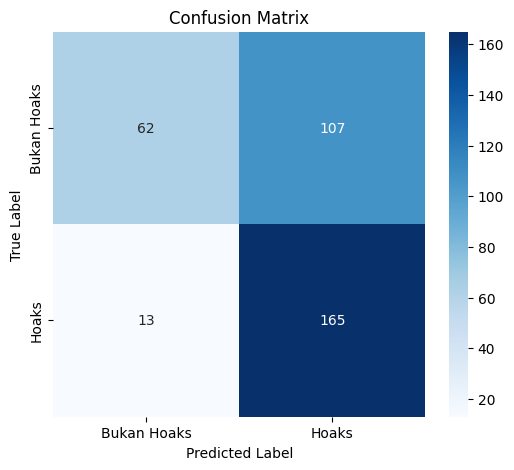

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred = best_model.predict(X_test)

# Akurasi
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Hoaks', 'Hoaks'], yticklabels=['Bukan Hoaks', 'Hoaks'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model dengan parameter terbaik
best_model = LogisticRegression(C=grid.best_params_['C'], solver=grid.best_params_['solver'], max_iter=500)

# Latih model dengan seluruh data training
best_model.fit(X_resampled, y_resampled)  # Menggunakan data yang di-resample dengan SMOTE

LogisticRegression(C=1, max_iter=500, solver='liblinear')

In [19]:
import pickle

# Menyimpan model
filename_model = 'model_logreg.pkl'
pickle.dump(best_model, open(filename_model, 'wb'))

# Menyimpan TF-IDF Vectorizer
filename_tfidf = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(filename_tfidf, 'wb'))

In [25]:
import pickle

# Load model dan TF-IDF Vectorizer
model = pickle.load(open('model_logreg.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

# Fungsi clean_text (sama seperti sebelumnya)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords])
    text = stemmer.stem(text)
    return text

# Data judul dan narasi berita
judul_berita = ["Kronologis Polisi Berondong Sedan Terobos Razia di Lubuklinggau"]
narasi_berita = ["Innalillah… Hanya Karena Lalai Terobos Razia, Mobil Berisi Satu Keluarga Ditembaki Polisi, Satu Oran..."]

# Gabungkan judul dan narasi
teks_gabungan = [judul + " " + narasi for judul, narasi in zip(judul_berita, narasi_berita)]

# Pra-proses teks gabungan
cleaned_text = [clean_text(text) for text in teks_gabungan]
text_tfidf = tfidf_vectorizer.transform(cleaned_text)

# Prediksi
prediction = model.predict(text_tfidf)

print(prediction) # Output prediksi (0 atau 1)

[0]
